In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

import glob
import json
import warnings
import networkx as nx
import collections

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

warnings.filterwarnings("ignore")

In [2]:
def load_json(pth):
    try:
        return json.load(open(pth, "r"))
    except:
        return {}

In [3]:
tweets = json.load(open("./data/tweets.json", "r"))
tweets_df = pd.DataFrame(tweets).T
tweets_df.shape

(981062, 9)

In [4]:
tweets_df.head(10)

,text,id,public_metrics,author_id,lang,referenced_tweets,created_at,in_reply_to_user_id,withheld
1505636536410415105,RT @drsimonegold: BREAKING: Fauci says it may ...,1505636536410415105,"{'retweet_count': 6882, 'reply_count': 0, 'lik...",1450563887598817282,en,"[{'type': 'retweeted', 'id': '1505239576117399...",2022-03-20T20:04:58.000Z,NaN,NaN
1505577860521934850,@DataDrivenMD What you think of us will determ...,1505577860521934850,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1460673206323490823,en,"[{'type': 'replied_to', 'id': '150557725719196...",2022-03-20T16:11:48.000Z,738806388,NaN
1505535918152855558,"RT @aaronhoyland: Can we stop with this ""Why a...",1505535918152855558,"{'retweet_count': 6005, 'reply_count': 0, 'lik...",986277108514263040,en,"[{'type': 'retweeted', 'id': '1504832904962056...",2022-03-20T13:25:09.000Z,NaN,NaN
1505643442579423232,RT @MollyJongFast: When will the Fox News host...,1505643442579423232,"{'retweet_count': 742, 'reply_count': 0, 'like...",15114186,en,"[{'type': 'retweeted', 'id': '1505643067403079...",2022-03-20T20:32:24.000Z,NaN,NaN
1505595266996518915,RT @JackPosobiec: BREAKING: Twitter is censori...,1505595266996518915,"{'retweet_count': 4781, 'reply_count': 0, 'lik...",558026918,en,"[{'type': 'retweeted', 'id': '1505549024300089...",2022-03-20T17:20:58.000Z,NaN,NaN
1505495846653243399,RT @optimismworks00: People will start wearing...,1505495846653243399,"{'retweet_count': 160, 'reply_count': 0, 'like...",2789828315,en,"[{'type': 'retweeted', 'id': '1505439931312881...",2022-03-20T10:45:55.000Z,NaN,NaN
1505565294399418369,"RT @EMWResearch: ***This image, which has circ...",1505565294399418369,"{'retweet_count': 4240, 'reply_count': 0, 'lik...",485288051,en,"[{'type': 'retweeted', 'id': '1505283816016863...",2022-03-20T15:21:52.000Z,NaN,NaN
1505604632697049093,Things that Johnson has mismanaged\n1. Zaghari...,1505604632697049093,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",406583979,en,"[{'type': 'quoted', 'id': '1505441775338463233'}]",2022-03-20T17:58:11.000Z,NaN,NaN
1505687732798074889,Extend School Meal Waivers!\nH.R. 6613 allows ...,1505687732798074889,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",19065112,en,NaN,2022-03-20T23:28:24.000Z,NaN,NaN
1505650455304622087,Looking for Alpha? Get Alpha with LevelUp and ...,1505650455304622087,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1158490141570359296,en,NaN,2022-03-20T21:00:16.000Z,NaN,NaN


In [5]:
auth_count = tweets_df.author_id.value_counts().sort_values()
auth_count.tail(15)

958266834398015489     180
1239842902026534913    181
1423305943077425155    187
1327723330636492804    187
1225793633342935043    192
1486832913895370757    195
172943852              197
863572378324017158     222
3091880673             226
899614225382785025     258
1324830614256783362    383
1032595605737144320    411
318412378              450
983658091874054144     598
3219670842             697
Name: author_id, dtype: int64

In [6]:
auth_count.describe([.95, .98])

count    490423.000000
mean          2.000438
std           3.914690
min           1.000000
50%           1.000000
95%           6.000000
98%          10.000000
max         697.000000
Name: author_id, dtype: float64

In [7]:
from xgboost import XGBClassifier
from sentence_transformers import SentenceTransformer

In [8]:
class Model:
    def __init__(self, xgb_pth="./model/boost.pkl"):
        import pickle
        
        self.emb = SentenceTransformer("all-MiniLM-L6-v2", device="cuda")
        with open(xgb_pth, "rb") as f:
            self.xgb = pickle.load(f)
    
    def fit(self, X_train, y_train):
        X_emb = self.emb.encode(X_train)
        self.xgb.fit(X_emb, y_train)
        return self
    
    def predict(self, X_test):
        X_emb = self.emb.encode(X_test)
        preds = self.xgb.predict(X_emb)
        return preds
    
    def predict_proba(self, X_test):
        X_emb = self.emb.encode(X_test)
        preds = self.xgb.predict_proba(X_emb)
        return preds

In [9]:
model = Model("./model/boost.pkl")

In [21]:
BATCH_SIZE = 10000
batch_index = [[i]*BATCH_SIZE for i in range(len(tweets_df)//BATCH_SIZE)]
batch_index.append([len(batch_index)]*(len(tweets_df)%BATCH_SIZE))

batch_index = [j for i in batch_index for j in i]

len(batch_index) == len(tweets_df)

True

In [22]:
tweets_df["BATCH_INDEX"] = batch_index

In [24]:
import tqdm
import gc

In [25]:
result = []
for batch_number, batch_df in tqdm.tqdm(tweets_df.groupby("BATCH_INDEX")):
    gc.collect()
    probs = model.predict_proba(batch_df.text.values)
    result.append(probs[:, 1])

100%|██████████| 99/99 [19:01<00:00, 11.53s/it]


In [29]:
for i in result[:5]:
    print(i[:8].tolist())

[0.5220005512237549, 0.972593367099762, 0.3764491081237793, 0.22162148356437683, 0.08751413971185684, 0.6904924511909485, 0.05591735988855362, 0.13315322995185852]
[0.1515233814716339, 0.15299464762210846, 0.11401960253715515, 0.49137163162231445, 0.3283948302268982, 0.7171766757965088, 0.05636215582489967, 0.005997694097459316]
[0.24087309837341309, 0.9990872144699097, 0.034775786101818085, 0.14327815175056458, 0.9941415190696716, 0.21245364844799042, 0.907581090927124, 0.1311342418193817]
[0.004723585210740566, 0.9574006795883179, 0.7309916019439697, 0.7680149674415588, 0.10807632654905319, 0.5956277251243591, 0.8744463920593262, 0.0005534834926947951]
[0.0055485013872385025, 0.04235750809311867, 0.9703096151351929, 0.0034259536769241095, 0.758430004119873, 0.10070756822824478, 0.0019057946046814322, 0.3347012996673584]


In [30]:
probs = [
    j for i in result for j in i
]

len(probs)

981062

In [31]:
tweets_df["PROBS"] = probs
tweets_df.sample(10)

,text,id,public_metrics,author_id,lang,referenced_tweets,created_at,in_reply_to_user_id,withheld,BATCH_INDEX,PROBS
1505031046286360579,"RT @DebraJ43: CTV has used the term ""post pand...",1505031046286360579,"{'retweet_count': 171, 'reply_count': 0, 'like...",188860399,en,"[{'type': 'retweeted', 'id': '1504620713923162...",2022-03-19T03:58:58.000Z,NaN,NaN,87,0.030335
1505583464770420738,RT @OnlyTums: @Achilles_na Mojolo the pandemic 😂😂,1505583464770420738,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",1044522639497334784,en,"[{'type': 'retweeted', 'id': '1505569382185017...",2022-03-20T16:34:05.000Z,NaN,NaN,88,0.006340
1505369084166553601,@jboyded @drkerrynphelps Propaganda from someo...,1505369084166553601,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1357225054606553092,en,"[{'type': 'replied_to', 'id': '150366451284240...",2022-03-20T02:22:12.000Z,175339579,NaN,58,0.008189
1505537410955943944,RT @ScienceWDrDoug: A 34 year old woman died a...,1505537410955943944,"{'retweet_count': 3984, 'reply_count': 0, 'lik...",1200193955641659393,en,"[{'type': 'retweeted', 'id': '1505259015172935...",2022-03-20T13:31:04.000Z,NaN,NaN,97,0.180857
1505416151324663811,"Corruption has killed more life than Covid-19,...",1505416151324663811,"{'retweet_count': 7, 'reply_count': 0, 'like_c...",527596729,en,NaN,2022-03-20T05:29:14.000Z,NaN,NaN,6,0.032116
1505379263528448005,"RT @aaronhoyland: Can we stop with this ""Why a...",1505379263528448005,"{'retweet_count': 6004, 'reply_count': 0, 'lik...",5149711,en,"[{'type': 'retweeted', 'id': '1504832904962056...",2022-03-20T03:02:39.000Z,NaN,NaN,40,0.376449
1505550243563253769,RT @JackPosobiec: MSM finally getting around t...,1505550243563253769,"{'retweet_count': 784, 'reply_count': 0, 'like...",1245747400641335298,en,"[{'type': 'retweeted', 'id': '1505547174595149...",2022-03-20T14:22:04.000Z,NaN,NaN,79,0.756887
1505677970509537280,"@PTruthspeaker Frankly, I don't want to spend ...",1505677970509537280,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1237533914341601280,en,"[{'type': 'replied_to', 'id': '150557451512388...",2022-03-20T22:49:36.000Z,1226545844532514819,NaN,63,0.993813
1505033603364888579,Remember in the early part of the Pandemic whe...,1505033603364888579,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1375518419278311430,en,NaN,2022-03-19T04:09:07.000Z,NaN,NaN,15,0.006124
1505576427101507591,"RT @BernieSpofforth: We all know this, but any...",1505576427101507591,"{'retweet_count': 2764, 'reply_count': 0, 'lik...",1199635520399249410,en,"[{'type': 'retweeted', 'id': '1505494735573729...",2022-03-20T16:06:07.000Z,NaN,NaN,52,0.000149


In [32]:
tweets_df["PROBS"].describe()

count    981062.000000
mean          0.368482
std           0.361601
min           0.000002
25%           0.029637
50%           0.230391
75%           0.716360
max           0.999998
Name: PROBS, dtype: float64

In [33]:
tweets_df = tweets_df[tweets_df["PROBS"]<0.5]
tweets_df.shape

(635192, 11)

In [34]:
auth_count = tweets_df.author_id.value_counts().sort_values()
auth_count.tail(5)

1239842902026534913    167
172943852              188
1032595605737144320    210
899614225382785025     235
318412378              410
Name: author_id, dtype: int64

In [35]:
selected_auth = auth_count[auth_count>=10]
selected_auth.shape

(4621,)

In [36]:
tweets_df = tweets_df[tweets_df.author_id.isin(selected_auth.index)]
tweets_df.shape

(77118, 11)

In [37]:
tweets_df.head()

,text,id,public_metrics,author_id,lang,referenced_tweets,created_at,in_reply_to_user_id,withheld,BATCH_INDEX,PROBS
1505517041142403076,RT @LitigationGuy: Tam acknowledges there is n...,1505517041142403076,"{'retweet_count': 1174, 'reply_count': 0, 'lik...",1177542652407025669,en,"[{'type': 'retweeted', 'id': '1505019315447209...",2022-03-20T12:10:08.000Z,NaN,NaN,0,0.033241
1505450430804873218,MADONNA PROJECT TOPICS AND MATERIALS\nGet Comp...,1505450430804873218,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1098498551896780800,en,NaN,2022-03-20T07:45:27.000Z,NaN,NaN,0,0.009571
1505632311634640896,RT @TheRealBudBundy: Only it won't be like tha...,1505632311634640896,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",985173084565983232,en,"[{'type': 'retweeted', 'id': '1505359767149109...",2022-03-20T19:48:11.000Z,NaN,NaN,0,0.077822
1505379430465949705,@SyLicoNgaAko PHLS could have bought 100 MILLI...,1505379430465949705,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",142974764,en,"[{'type': 'replied_to', 'id': '150520653772346...",2022-03-20T03:03:19.000Z,338899489,NaN,0,0.045412
1505627804846723073,@kaki385 Correct. The common cold is also know...,1505627804846723073,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1048213193531641858,en,"[{'type': 'replied_to', 'id': '150555133439248...",2022-03-20T19:30:16.000Z,1227683970881441794,NaN,0,0.003550


In [38]:
tweets_df.to_json("./fakes_tweets/tweets.json")

## Reload Here

In [3]:
tweets = load_json("./fakes_tweets/tweets.json")
len(tweets)

11

In [4]:
tweets_df = pd.DataFrame(tweets)
tweets_df.head()

,text,id,public_metrics,author_id,lang,referenced_tweets,created_at,in_reply_to_user_id,withheld,BATCH_INDEX,PROBS
1505517041142403076,RT @LitigationGuy: Tam acknowledges there is n...,1505517041142403076,"{'retweet_count': 1174, 'reply_count': 0, 'lik...",1177542652407025669,en,"[{'type': 'retweeted', 'id': '1505019315447209...",2022-03-20T12:10:08.000Z,None,None,0,0.033241
1505450430804873218,MADONNA PROJECT TOPICS AND MATERIALS\nGet Comp...,1505450430804873218,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1098498551896780800,en,None,2022-03-20T07:45:27.000Z,None,None,0,0.009571
1505632311634640896,RT @TheRealBudBundy: Only it won't be like tha...,1505632311634640896,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",985173084565983232,en,"[{'type': 'retweeted', 'id': '1505359767149109...",2022-03-20T19:48:11.000Z,None,None,0,0.077822
1505379430465949705,@SyLicoNgaAko PHLS could have bought 100 MILLI...,1505379430465949705,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",142974764,en,"[{'type': 'replied_to', 'id': '150520653772346...",2022-03-20T03:03:19.000Z,338899489,None,0,0.045412
1505627804846723073,@kaki385 Correct. The common cold is also know...,1505627804846723073,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1048213193531641858,en,"[{'type': 'replied_to', 'id': '150555133439248...",2022-03-20T19:30:16.000Z,1227683970881441794,None,0,0.003550


In [5]:
tweets_df.index = tweets_df["id"].values

auth_count = tweets_df.author_id.value_counts().sort_values()
auth_count.tail(5)

1239842902026534913    167
172943852              188
1032595605737144320    210
899614225382785025     235
318412378              410
Name: author_id, dtype: int64

In [6]:
auth_count.describe([0.75,.95, .98])

count    4621.000000
mean       16.688596
std        13.613074
min        10.000000
50%        13.000000
75%        18.000000
95%        34.000000
98%        49.000000
max       410.000000
Name: author_id, dtype: float64

In [7]:
tweets_df.isna().sum()

text                       0
id                         0
public_metrics             0
author_id                  0
lang                       0
referenced_tweets       6413
created_at                 0
in_reply_to_user_id    66756
withheld               77113
BATCH_INDEX                0
PROBS                      0
dtype: int64

In [8]:
auth_count = auth_count[auth_count>1]
auth_count.shape

(4621,)

In [9]:
tweets_df = tweets_df[tweets_df.author_id.isin(auth_count.index)]
tweets_df.shape

(77118, 11)

In [10]:
tweets_df.fillna("None", inplace=True)

In [11]:
def compute_diffusion_graph(tweets: pd.DataFrame):
    graph = nx.DiGraph()
    tweet_ids = set(tweets["id"].values)
    for tweet_id, tweet in tweets.iterrows():
        graph.add_node(tweet_id, text=tweet["text"], author_id=tweet["author_id"])
        if tweet["referenced_tweets"] != "None":
            for reply_tweet in tweet["referenced_tweets"]:
                if reply_tweet["id"] in tweet_ids:
                    graph.add_edge(reply_tweet["id"], tweet_id)
    return graph

In [12]:
graph = compute_diffusion_graph(tweets_df)
print(graph)

DiGraph with 77118 nodes and 6673 edges


In [13]:
%%time
nodes_connected = [
    list(c) for c in nx.connected_components(graph.to_undirected())
]

nodes_connected = sorted(nodes_connected, key=len, reverse=True)

CPU times: user 421 ms, sys: 20.3 ms, total: 441 ms
Wall time: 440 ms


In [14]:
print([len(i) for i in nodes_connected[:15]])

[217, 165, 64, 53, 49, 20, 19, 17, 17, 16, 16, 15, 15, 14, 14]


In [15]:
def draw_graph(G, edge_color=True, figsize=(10, 10), title="Communication Flow", default_size=15):
    plt.figure(figsize=figsize)
    labels = {node:node for node in G.nodes}
    
    if edge_color:
        # https://stackoverflow.com/a/60641770/12230833
        pos = nx.random_layout(G)
        
        d = dict(G.degree)
        
        nx.draw_networkx_nodes(G, pos, node_color = 'r', nodelist=d.keys(), node_size=[v * default_size for v in d.values()], alpha = 1)
        nx.draw_networkx_labels(G, pos, labels, font_size=6, font_color='b')
        
        
        ax = plt.gca()
        for e in G.edges:
            ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(
                    arrowstyle="<-", color="0.5",
                    shrinkA=5, shrinkB=5,
                    patchA=None, patchB=None,
                    connectionstyle="arc3,rad=0.3" # .replace('rrr',str(0.3*e[2])) #,rad=0.3 # .replace('rrr',str(0.3*e[2])
                ),
            )
        
    else:
        nx.draw_networkx(G, with_labels=True)
    
    plt.title(title)
    plt.axis('off')
    plt.show()

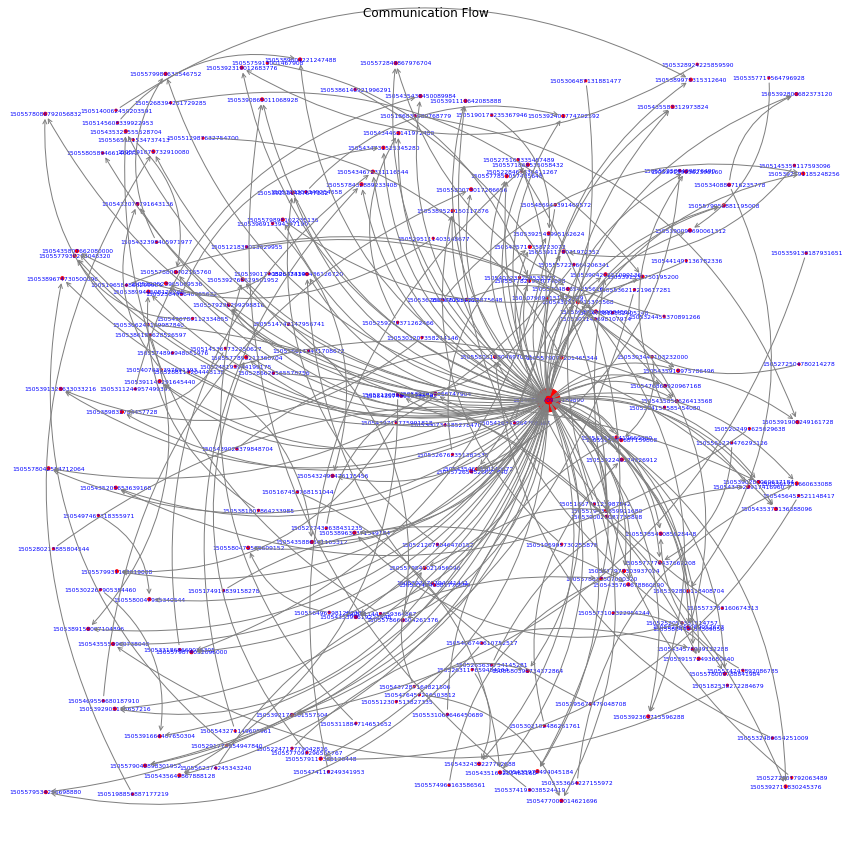

In [13]:
draw_graph(graph.subgraph(nodes_connected[0]), figsize=(15, 15), default_size=5)

In [16]:
len(nodes_connected)

6455

In [13]:
nx.write_gpickle(graph, "./fakes_tweets/small_graph.pkl")